In [31]:
import numpy as np
import pandas as pd
import nltk

#### Task1

Створити програму, яка зчитує заданий набір даних, виконує попередню обробку, розбиває дані на навчальні та тестові,
виконує аналіз настроїв за допомогою наївного баєсівського класифікатора.

In [32]:
data_df = pd.read_csv('movie2.csv')

In [33]:
total_nulls = data_df[data_df.text.str.strip() == ''].shape[0]
print("Порожні документи:", total_nulls)

Порожні документи: 0


In [34]:
import re

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')


def preproc_doc(doc):
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = re.sub(r'http\S+', '', doc)
    doc = doc.lower()
    doc = doc.strip()
    tokens = wpt.tokenize(doc)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    return doc


preproc_corpus = np.vectorize(preproc_doc)
p_corpus = preproc_corpus(data_df['text'])
data_df['comment'] = p_corpus
data_df

,Unnamed: 0,text,label,comment
0,27746,This movie is basically a spoof on Hitchcock's...,1,movie basically spoof hitchcocks strangers tra...
1,27180,"With the exception of the main character, the ...",1,exception main character acting didnt convince...
2,23274,Both Robert Duvall and Glenn Close played thei...,1,robert duvall glenn close played roles believa...
3,31940,First of all I need to say that I'm Portuguese...,1,first need say im portuguese usual spend time ...
4,27106,This is an excellent film about a traditional ...,1,excellent film traditional working class famil...
...,...,...,...,...
19995,36255,This movie was not very good in my opinion. Wh...,0,movie good opinion complete waste hour half lu...
19996,39202,Before I saw this masterpiece I never would ha...,0,saw masterpiece never would guessed devastatin...
19997,24395,This is a German film from 1974 that is someth...,0,german film something women come castle beyond...
19998,29889,"No, *Hitch* is decidedly NOT a romantic-comedy...",0,hitch decidedly romanticcomedy bilious bibulou...


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_df['comment'], data_df['label'], test_size=0.2, random_state=42)

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [37]:
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)

y_pred_MNB = classifier.predict(X_test_vect)

#### Task 2

Розрахувати матрицю невідповідностей, провести оцінку точності моделі.

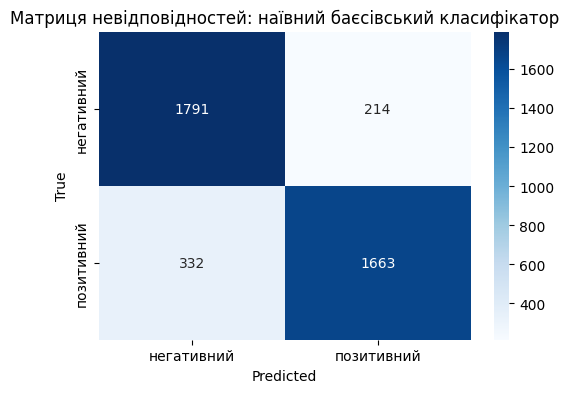

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm_MNB = confusion_matrix(y_test, y_pred_MNB)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_MNB, annot=True, fmt='d', cmap='Blues', xticklabels=['негативний', 'позитивний'],
            yticklabels=['негативний', 'позитивний'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Матриця невідповідностей: наївний баєсівський класифікатор")
plt.show()

In [39]:
accuracy_MNB = accuracy_score(y_test, y_pred_MNB)
print("Точність моделі з TextBlob: {:.2f}%".format(accuracy_MNB * 100))

Точність моделі з TextBlob: 86.35%


#### Task 3

Використати один з готових лексиконів, Textblob, для аналізу оцінки настроїв.
Також розрахувати матрицю невідповідностей, провести оцінку точності моделі.

In [40]:
from textblob import TextBlob

data_df['sentiment'] = data_df['comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

X_train, X_test, y_train, y_test = train_test_split(data_df['sentiment'],
                                                    data_df['label'],
                                                    test_size=0.2,
                                                    random_state=42)

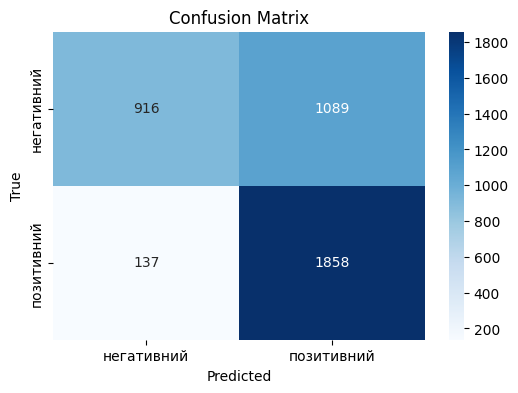

In [41]:
threshold = 0.0
y_pred_TB = [1 if sentiment >= threshold else 0 for sentiment in X_test]

cm_TB = confusion_matrix(y_test, y_pred_TB)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_TB, annot=True, fmt='d', cmap='Blues', xticklabels=['негативний', 'позитивний'],
            yticklabels=['негативний', 'позитивний'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [42]:
accuracy_TB = accuracy_score(y_test, y_pred_TB)
print("Точність моделі з TextBlob: {:.2f}%".format(accuracy_TB * 100))

Точність моделі з TextBlob: 69.35%


#### Task 4

 Обрати три випадкові записи та вивести результати оцінки їх настрою за пунктами 1 і 3.

In [43]:
random_samples = data_df.sample(3)

In [44]:
print("Результати оцінки настрою за пунктами наївного баєсівського класифікатора:")
for index, row in random_samples.iterrows():
    comment = row['comment']
    label = row['label']
    X_sample_vec = vectorizer.transform([comment])
    prediction = classifier.predict(X_sample_vec)[0]
    print("comment:\n", comment)
    print("label:", label)
    print("прогноз:", prediction)
    print("--------------------")

Результати оцінки настрою за пунктами наївного баєсівського класифікатора:
comment:
 way lamberto bava substandard facsimilie father mario extremely overrated director anyway michele soavi substandard director dario argento mold church least one thing recommend itthe incredibly detailed art directionbut absolutely nothing else film longwinded filled onedimensional characters almost put sleep several times theres fine line art pretentious crap church isnt completely worthless youd better watching something elsebr br
label: 0
прогноз: 0
--------------------
comment:
 think one people found another one roths pearls performance awarded stunning story told eloquently francis ford coppola years earlier really unfolds gradually leaves room characters develop roeg proves doesnt warsetting interressting wonderful location lies story contrast ruthlessnes beauty go hand hand loneliness become best friend shows sinister past small golden age kingdom lands coast full wealth st world country u send 

In [45]:
print("Результати оцінки настрою за пунктами TextBlob:")
for index, row in random_samples.iterrows():
    comment = row['comment']
    label = row['label']
    sentiment = TextBlob(comment).sentiment.polarity
    if sentiment >= 0:
        prediction = 1
    else:
        prediction = 0
    print("comment:\n", comment)
    print("label:", label)
    print("оцінка настрою:", sentiment)
    print("прогноз:", prediction)
    print("--------------------")

Результати оцінки настрою за пунктами TextBlob:
comment:
 way lamberto bava substandard facsimilie father mario extremely overrated director anyway michele soavi substandard director dario argento mold church least one thing recommend itthe incredibly detailed art directionbut absolutely nothing else film longwinded filled onedimensional characters almost put sleep several times theres fine line art pretentious crap church isnt completely worthless youd better watching something elsebr br
label: 0
оцінка настрою: -0.03712121212121213
прогноз: 0
--------------------
comment:
 think one people found another one roths pearls performance awarded stunning story told eloquently francis ford coppola years earlier really unfolds gradually leaves room characters develop roeg proves doesnt warsetting interressting wonderful location lies story contrast ruthlessnes beauty go hand hand loneliness become best friend shows sinister past small golden age kingdom lands coast full wealth st world count